# COMP5101 Assignment 4
### Bahadır Özkan

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
train = pd.read_csv(url,names=['age', 'gender', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','diagnosis'],na_values=["?"])

In [48]:
X = train.iloc[:,0:12]
y = train.iloc[:,13]
y = y.replace([1,2,3,4],[1,1,1,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test = scaler.transform(X_test)


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(212, 12) (212,)
(91, 12) (91,)


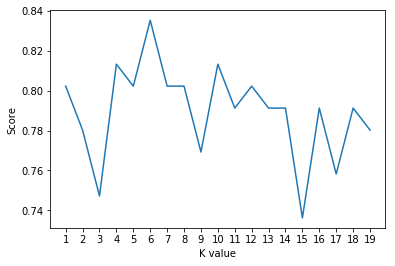

Maximum KNN Score is 83.52%


In [49]:
# try ro find best k value
scores = []
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train);
    scores.append(model.score(X_test,y_test))
    
plt.plot(range(1,20), scores)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scores)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

In [50]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score  
import seaborn as sns

neighbors = [1,3,4,6,7,9]
cms = []
acc = []

for i in neighbors:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train);
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred) 
    cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])
    acc.append(accuracy_score(y_test, y_pred))
    cms.append(cm_df)

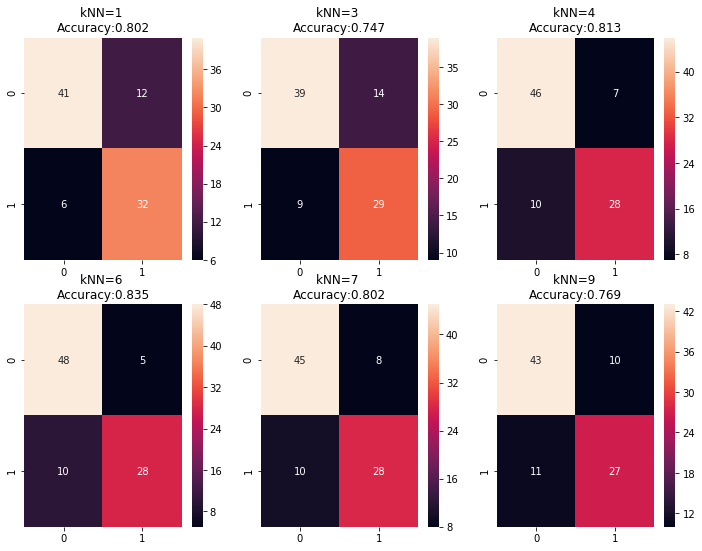

In [53]:
fig = plt.figure(figsize=(12,9))

#  subplot #1
fig.add_subplot(231)
plt.title('kNN=1 \nAccuracy:{0:.3f}'.format(acc[0]))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(cms[0], annot=True)

#  subplot #2
fig.add_subplot(232)
plt.title('kNN=3 \nAccuracy:{0:.3f}'.format(acc[1]))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(cms[1], annot=True)

#  subplot #3
fig.add_subplot(233)
plt.title('kNN=4 \nAccuracy:{0:.3f}'.format(acc[2]))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(cms[2], annot=True)

#  subplot #4
fig.add_subplot(234)
plt.title('kNN=6 \nAccuracy:{0:.3f}'.format(acc[3]))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(cms[3], annot=True)

#  subplot #5
fig.add_subplot(235)
plt.title('kNN=7 \nAccuracy:{0:.3f}'.format(acc[4]))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(cms[4], annot=True)

#  subplot #6
fig.add_subplot(236)
plt.title('kNN=9 \nAccuracy:{0:.3f}'.format(acc[5]))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(cms[5], annot=True)

plt.show()